In [38]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.visualization import plot_histogram

In [39]:
backend = Aer.get_backend("qasm_simulator")

# Oracles:

## $U_{A}$ : Constant 1

In [40]:
u_A_inner = QuantumCircuit(3, name='U_A')
u_A_inner.x(2)
u_A = u_A_inner.to_instruction()
u_A_inner.draw('mpl')

$U_{A}$ is defined by:
\begin{align}
|000\rangle & \mapsto |100\rangle \\
|001\rangle & \mapsto |101\rangle \\
|010\rangle & \mapsto |110\rangle \\
|011\rangle & \mapsto |111\rangle \\
|100\rangle & \mapsto |000\rangle \\
|101\rangle & \mapsto |001\rangle \\
|110\rangle & \mapsto |010\rangle \\
|111\rangle & \mapsto |011\rangle \\
\end{align}

Verification:
\begin{align}
X\otimes I\otimes I|000\rangle & = |110\rangle \\
X\otimes I\otimes I|001\rangle & = |111\rangle \\
X\otimes I\otimes I|010\rangle & = |100\rangle \\
X\otimes I\otimes I|011\rangle & = |101\rangle \\
X\otimes I\otimes I|100\rangle & = |010\rangle \\
X\otimes I\otimes I|101\rangle & = |011\rangle \\
X\otimes I\otimes I|110\rangle & = |000\rangle \\
X\otimes I\otimes I|111\rangle & = |001\rangle \\
\end{align}

# $U_{B}$ : Constant 0

In [41]:
u_B_inner = QuantumCircuit(3, name='U_B')
u_B = u_B_inner.to_instruction()
u_B_inner.draw('mpl')

$U_{B}$ is defined by:
\begin{align}
|000\rangle & \mapsto |000\rangle \\
|001\rangle & \mapsto |001\rangle \\
|010\rangle & \mapsto |010\rangle \\
|011\rangle & \mapsto |011\rangle \\
|100\rangle & \mapsto |100\rangle \\
|101\rangle & \mapsto |101\rangle \\
|110\rangle & \mapsto |110\rangle \\
|111\rangle & \mapsto |111\rangle \\
\end{align}

Verification:
\begin{align}
|000\rangle & = |010\rangle \\
|001\rangle & = |011\rangle \\
|010\rangle & = |000\rangle \\
|011\rangle & = |001\rangle \\
|100\rangle & = |110\rangle \\
|101\rangle & = |111\rangle \\
|110\rangle & = |100\rangle \\
|111\rangle & = |101\rangle \\
\end{align}


# $U_{C}$ : Least Significant Bit is 1

In [42]:
u_c_inner = QuantumCircuit(3,name='U_C')
u_c_inner.cnot(0,2)
u_c = u_c_inner.to_instruction()
u_c_inner.draw('mpl')

$U_{C}$ is defined by:
\begin{align}
|000\rangle & \mapsto |000\rangle \\
|001\rangle & \mapsto |101\rangle \\
|010\rangle & \mapsto |010\rangle \\
|011\rangle & \mapsto |111\rangle \\
|100\rangle & \mapsto |100\rangle \\
|101\rangle & \mapsto |001\rangle \\
|110\rangle & \mapsto |110\rangle \\
|111\rangle & \mapsto |011\rangle \\
\end{align}

Verification:
\begin{align}
CNOT_{0,2}|000\rangle & = |000\rangle \\
CNOT_{0,2}|001\rangle & = |101\rangle \\
CNOT_{0,2}|010\rangle & = |010\rangle \\
CNOT_{0,2}|011\rangle & = |111\rangle \\
CNOT_{0,2}|100\rangle & = |100\rangle \\
CNOT_{0,2}|101\rangle & = |001\rangle \\
CNOT_{0,2}|110\rangle & = |110\rangle \\
CNOT_{0,2}|111\rangle & = |011\rangle \\
\end{align}


# $U_{D}$ : Least Significant Bit is 0 

In [43]:
u_d_inner = QuantumCircuit(3,name="U_D")
u_d_inner.x(0)
u_d_inner.cnot(0,2)
u_d_inner.x(0)
u_d = u_d_inner.to_instruction()
u_d_inner.draw('mpl')

$U_{D}$ is defined by:
\begin{align}
|000\rangle & \mapsto |100\rangle \\
|001\rangle & \mapsto |001\rangle \\
|010\rangle & \mapsto |110\rangle \\
|011\rangle & \mapsto |011\rangle \\
|100\rangle & \mapsto |000\rangle \\
|101\rangle & \mapsto |101\rangle \\
|110\rangle & \mapsto |010\rangle \\
|111\rangle & \mapsto |111\rangle \\
\end{align}

Verification:
\begin{align}
(I \otimes I \otimes X) \circ CNOT_{0,2} \circ (I \otimes I \otimes X)|000\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{0,2}|001\rangle =
(I \otimes I \otimes X)|101\rangle =
|100\rangle \\
(I \otimes I \otimes X) \circ CNOT_{0,2} \circ (I \otimes I \otimes X)|001\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{0,2}|000\rangle =
(I \otimes I \otimes X)|000\rangle =
|001\rangle \\
(I \otimes I \otimes X) \circ CNOT_{0,2} \circ (I \otimes I \otimes X)|010\rangle & =
(I \otimes I \otimes X) \circ CNOT_{0,2}|011\rangle =
(I \otimes I \otimes X)|111\rangle =
|110\rangle \\
(I \otimes I \otimes X) \circ CNOT_{0,2} \circ (I \otimes I \otimes X)|011\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{0,2}|010\rangle =
(I \otimes I \otimes X)|010\rangle =
|011\rangle \\
(I \otimes I \otimes X) \circ CNOT_{0,2} \circ (I \otimes I \otimes X)|100\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{0,2}|101\rangle =
(I \otimes I \otimes X)|001\rangle =
|000\rangle \\
(I \otimes I \otimes X) \circ CNOT_{0,2} \circ (I \otimes I \otimes X)|101\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{0,2}|100\rangle =
(I \otimes I \otimes X)|100\rangle =
|101\rangle \\
(I \otimes I \otimes X) \circ CNOT_{0,2} \circ (I \otimes I \otimes X)|110\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{0,2}|111\rangle =
(I \otimes I \otimes X)|011\rangle =
|010\rangle \\
(I \otimes I \otimes X) \circ CNOT_{0,2} \circ (I \otimes I \otimes X)|111\rangle & = 
(I \otimes I \otimes X) \circ CNOT_{0,2}|110\rangle =
(I \otimes I \otimes X)|110\rangle =
|111\rangle \\
\end{align}


# The Deutsch algorithm:

In [44]:
c = QuantumCircuit(3,2)
c.x(2)
c.barrier();
c.h(0);
c.h(1);
c.h(2);
#c.append(u_A, [0, 1, 2]);
#c.append(u_B, [0, 1, 2]);
#c.append(u_c, [0, 1, 2]);
c.append(u_d, [0, 1, 2]);
c.h(0);
c.h(1);
c.barrier();
c.measure(range(2),range(2));
c.draw('mpl')

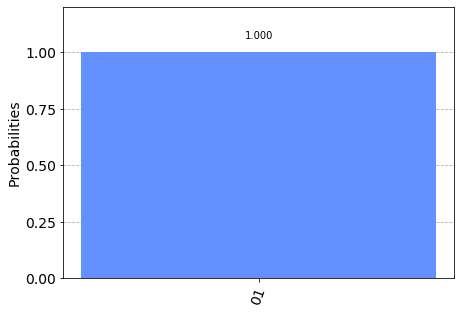

In [45]:
job = execute(c, backend=backend, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)

# Verifications:

## Deutsch$(U_{A})$

We need to know the definition of $U_{A}|-++\rangle$ below, so we
calculate it here: 

\begin{align}
U_A|-++\rangle
&= U_A \frac{1}{2\sqrt{2}}(|000\rangle + |010\rangle + |001\rangle + |011\rangle - |100\rangle - |110\rangle - |101\rangle - |111\rangle) \\
&= \frac{1}{2\sqrt{2}}(|100\rangle + |110\rangle + |101\rangle + |111\rangle - |000\rangle - |010\rangle - |001\rangle - |011\rangle) \\
&= \frac{1}{\sqrt{2}}(|1\rangle - |0\rangle) \otimes \frac{1}{2}(|00\rangle + |10\rangle + |01\rangle + |11\rangle) \\
&= -|-++\rangle\\
\end{align}

Next we verify that Deutch of the constant 1 function has a 00 as the least significant bits
\begin{align}
(I \otimes H \otimes H)\circ U_{A} \circ (H \otimes H \otimes H) \circ (X \otimes I \otimes I)|000\rangle 
&= (I \otimes H \otimes H)\circ U_{A} \circ (H \otimes H \otimes H)|100\rangle \\
&= (I \otimes H \otimes H)\circ U_{A}|-++\rangle\\
&= (I \otimes H \otimes H)(-|-++\rangle) \\
&= -|-00\rangle
\end{align}

## Deutsch$(U_{B})$

We need to know the definition of $U_{B}|-++\rangle$ below, so we
calculate it here: 

\begin{align}
U_B|-++\rangle
&= U_B \frac{1}{2\sqrt{2}}(|000\rangle + |010\rangle + |001\rangle + |011\rangle - |100\rangle - |110\rangle - |101\rangle - |111\rangle) \\
&= \frac{1}{2\sqrt{2}}(|000\rangle + |010\rangle + |001\rangle + |011\rangle - |100\rangle - |110\rangle - |101\rangle - |111\rangle) \\
&= |-++\rangle
\end{align}

Next we verify that Deutch of the constant 1 function has a 00 as the least significant bits.
\begin{align}
(I \otimes H \otimes H)\circ U_{B} \circ (H \otimes H \otimes H) \circ (X \otimes I \otimes I)|000\rangle 
&= (I \otimes H \otimes H)\circ U_{B} \circ (H \otimes H \otimes H)|100\rangle \\
&= (I \otimes H \otimes H)\circ U_{B}|-++\rangle\\
&= (I \otimes H \otimes H)|-++\rangle \\
&= |100\rangle
\end{align}

## Deutsch$(U_{C})$

We need to know the definition of $U_{C}|-++\rangle$ below, so we
calculate it here: 

\begin{align}
U_C|-++\rangle
&= U_C \frac{1}{2\sqrt{2}}(|000\rangle + |010\rangle + |001\rangle + |011\rangle - |100\rangle - |110\rangle - |101\rangle - |111\rangle) \\
&= \frac{1}{2\sqrt{2}}(|000\rangle + |010\rangle + |101\rangle +
|111\rangle - |100\rangle - |110\rangle - |001\rangle - |011\rangle)\\ 
&= \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \otimes \frac{1}{2}(|00\rangle + |10\rangle - |01\rangle - |11\rangle) \\
&= |-\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \\
&= |-+-\rangle
\end{align}

Next we verify that Deutch of the constant 1 function has a 01 as the least significant bits.
\begin{align}
(I \otimes H \otimes H)\circ U_{C} \circ (H \otimes H \otimes H) \circ (X \otimes I \otimes I)|000\rangle 
&= (I \otimes H \otimes H)\circ U_{C} \circ (H \otimes H \otimes H)|100\rangle \\
&= (I \otimes H \otimes H)\circ U_{C}|-++\rangle\\
&= (I \otimes H \otimes H)|-+-\rangle \\
&= |-01\rangle
\end{align}

## Deutsch$(U_{D})$

We need to know the definition of $U_{D}|-++\rangle$ below, so we
calculate it here: 

\begin{align}
U_D|-++\rangle
&= U_D \frac{1}{2\sqrt{2}}(|000\rangle + |010\rangle + |001\rangle + |011\rangle - |100\rangle - |110\rangle - |101\rangle - |111\rangle) \\
&= \frac{1}{2\sqrt{2}}(|100\rangle + |110\rangle + |001\rangle + |011\rangle - |000\rangle - |010\rangle - |101\rangle - |111\rangle) \\
&= \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \otimes \frac{1}{2}(|01\rangle + |11\rangle - |00\rangle - |10\rangle)\\
&= |-\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}}(|1\rangle - |0\rangle)\\
&= |-\rangle \otimes |+\rangle \otimes -|-\rangle\\
&= -|-+-\rangle
\end{align}

Next we verify that Deutch of the constant 1 function has a 01 as the least significant bits.
\begin{align}
(I \otimes H \otimes H)\circ U_{D} \circ (H \otimes H \otimes H) \circ (X \otimes I \otimes I)|000\rangle 
&= (I \otimes H \otimes H)\circ U_{D} \circ (H \otimes H \otimes H)|100\rangle \\
&= (I \otimes H \otimes H)\circ U_{D}|-++\rangle\\
&= (I \otimes H \otimes H)-|-+-\rangle \\
&= -|-01\rangle
\end{align}